Input a decade from 1900 to 2010 : 2000
Input a category (Edition, Painting, Sculpture, Drawing, Photography):Edition


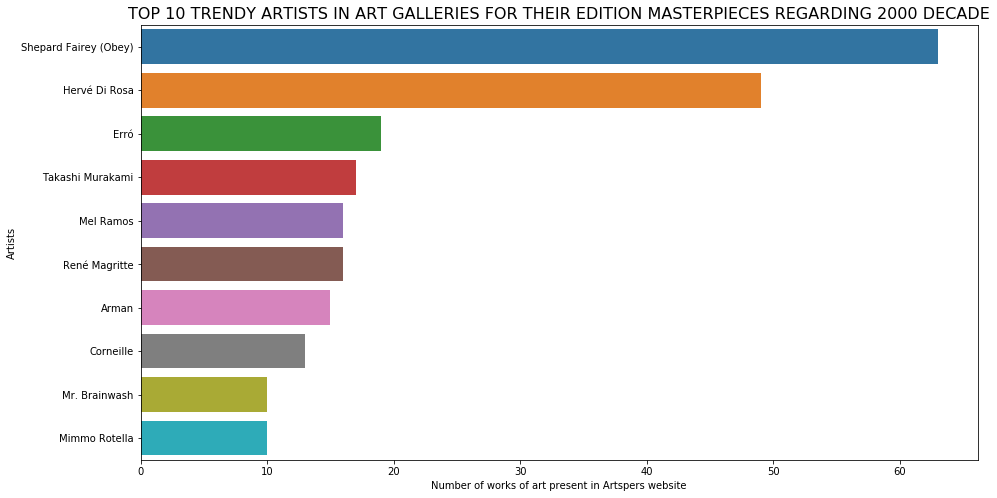

In [21]:
# Create a pipeline that will give the top 10 most influential contemporary artists in Art Galeries 
# (regarding Artsper website) for a given decenie and type of art."""

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import requests

while True:
    """The user enter the decade of his choice from 1900 to 2010"""
    
    list_decade = ['1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000','2010']
    decade = int(input('Input a decade from 1900 to 2010 : '))
    if str(decade) in list_decade:
           break
    else :
        print('The input must be a decade')
        continue

while True:
    """The user enter a type of art of his choice from the listed categories"""
    
    list_category = ['Edition', 'Painting', 'Sculpture', 'Drawing', 'Photography']
    category = str(input('Input a category (Edition, Painting, Sculpture, Drawing, Photography):')).title()
    if category in list_category:
           break
    else :
        print('The input must a category from the ones mentioned above')
        continue


def acquire_from_MySQL():
    """Function importing Artsper's data from MySQL database and creating a dataframe from it"""
    
    username='Abelia'
    password='password'
    host='localhost'
    database_name='ARTSPER'
    engine=create_engine(f"""mysql+pymysql://{username}:{password}@{host}/{database_name}""")
    df_artsper = pd.read_sql_query(f'SELECT * FROM data1', engine) 
    return df_artsper


def clean_dataframe(df_artsper):
    """Function cleaning some columns of the dataframe """
    
    # Strip the Name from the Date
    df_artsper['Date'] = df_artsper['Name & Date'].apply(lambda x: x.split()[-1].strip(' '))
    df_artsper['Name'] = df_artsper['Name & Date'].apply(lambda x: ' '.join(x.split()[:-1]).strip(','))
    # Convert french to english 
    df_artsper['Category'].replace({'Peinture': 'Painting', 'Dessin': 'Drawing', 'Photographie': 'Photography'}, inplace=True)
    
    #df_artsper.Theme=df_artsper.Theme.map(lambda x: ','.join(re.findall('(?:\w+ ?)+',x)))
    #df_artsper.Theme = df_artsper.Theme.apply(lambda x: x.split(','))
    return df_artsper


def create_decade(df_artsper):
    """Function creating a new decade column from the date column"""
    
    df_artsper["Decade"] = df_artsper["Date"].apply(lambda x: (str(x)[0:3]+ '0')).astype(int)
    return df_artsper


def order_columns(df_artsper):
    """Function selecting and ordering the columns that will appear in the final dataset"""
    
    df_artsper = df_artsper[['Artist','Name','Date','Decade','Category','Theme','Price','Dimension','City Galery','Name & Date']]
    return df_artsper   


def wrangle_decade(df_artsper, decade=decade):
    """Function filtering the dataframe regarding the chosen decade"""
    
    first_filtered = df_artsper[df_artsper['Decade']==decade]
    return first_filtered


def wrangle_category(first_filtered, category=category):
    """Function filtering the dataframe regarding the chosen category"""
    
    second_filtered = first_filtered[first_filtered['Category']==category]
    return second_filtered


def analyze(second_filtered):
    """Function analysing the top 10 trendy artists in Art Galeries regarding the chosen 
       decade and category"""
    
    grouped = second_filtered['Artist'].value_counts()
    results = grouped.sort_values(ascending = False).head(10).reset_index()
    results = results.rename(columns={'index':'Artists','Artist':'Number of works of art present in Artspers website'})
    return results


def report(results, decade=decade):
    """Function creating a barchart from the analysis and exporting it in a png file"""
    
    title ='TOP 10 TRENDY ARTISTS IN ART GALLERIES FOR THEIR '+str(category).upper()+ ' MASTERPIECES REGARDING '+ str(decade)+' DECADE'
    fig, ax = plt.subplots(figsize =(15,8))
    barchart = sns.barplot(data = results, x= 'Number of works of art present in Artspers website', y = 'Artists')
    plt.title(title, fontsize=16)
    fig=barchart.get_figure()
    fig.savefig(title+'.png')

    
if __name__=='__main__':
    """Pipeline executing all the functions above"""
    data = acquire_from_MySQL()
    df_artsper = clean_dataframe(data)
    df_artsper = create_decade(df_artsper)
    df_artsper = order_columns(df_artsper)
    first_filtered = wrangle_decade(df_artsper)
    second_filtered = wrangle_category(first_filtered)
    results = analyze(second_filtered)
    report(results)


__

In [ ]:
# To go further : Create a pipeline that will give the top 5 themes that have to be present to recreate the 
#  atmosphere of a given decenie and for the type of art.

def list_of_theme(df_artsper):
    """Function listing all the theme present in artsper's dataframe"""
    
    list_theme = []
    for i in range(len(df_artsper.Theme)):
        for j in range(len(df_artsper.Theme[i])):
            list_theme.append(df_artsper.Theme[i][j])
    complete_list = list(set(list_theme))
    return complete_list
print(list_of_theme(df_artsper))


def create_column_of_theme (df_artsper):
    """Function creating for each theme a new column filling '1' when the theme appears in the work of art"""
    
    list_theme = list_of_theme(df_artsper)
    for i in range(len(df_artsper.Theme)):
            for j in range(len(df_artsper.Theme[i])):
                for x in range(len(list_theme)):
                    if df_artsper.Theme[i][j] == list_theme[x]:
                        df_artsper.loc[(df_artsper.Theme[i][j]), list_theme[x]] = 1
    return df_artsper


def clean_all_theme (df_artsper):
    """Function replacing the values from all theme's columns to have only boolean values
    - 1 : the work of art is in the theme
    - 0 : the work of art is not in the theme"""
    
    df.applymap(lambda x : x.fillna(0).astype(int))
    return df_artsper
df_artsper = create_column_of_theme(df_artsper)